## (1) Import GAMUT Data into odm.sqlite

In [1]:
# subprocess allow users to use terminal commands in python 
import subprocess

In [6]:
# call sqlite3, import GAMUT data using GAMUT_input.txt which include tables as sites, methods, variables, datavalue, 
# methods into odm.sqlite
cmd = "sqlite3 -init GAMUT_input.txt odm.sqlite"
# run command above using subprocess
subprocess.run(cmd, shell=True)

CompletedProcess(args='sqlite3 -init GAMUT_input.txt odm.sqlite', returncode=0)

## (2) connect to odm.sqlite and check data that loaded correctly

In [2]:
import sqlite3 as lite
import pandas as pd

In [3]:
# connect to 'odm.sqlite'
conn = lite.connect('odm.sqlite')

In [4]:
# read sites table from odm.sqlite using read_sql_query attribute and create pandas DataFrame
df = pd.read_sql_query("SELECT * FROM sites", conn)
df.head()

,SiteID,SiteCode,SiteName,Latitude,Longitude,LatLongDatumID,Elevation_m,VerticalDatum,LocalX,LocalY,LocalProjectionID,PosAccuracy_m,State,County,Comments,SiteType
0,1,LR_WaterLab_AA,Logan River at the Utah Water Research Laborat...,41.739034,-111.795742,3,1414.000000,NGVD29,,,,,Utah,Cache,,Stream
1,2,LR_Mendon_AA,Logan River at Mendon Road (600 South),41.720533,-111.886928,3,1353.469604,NGVD29,,,,,Utah,Cache,,Stream
2,3,LR_MainStreet_BA,Logan River at Main Street (Highway 89/91) Bridge,41.721091,-111.835096,3,1377.000000,NGVD29,,,,,Utah,Cache,,Stream
3,4,LR_TWDEF_C,Climate Station at TW Daniels Experimental Forest,41.864805,-111.507494,3,2629.200000,NGVD29,,,,,Utah,Cache,,Atmosphere
4,5,LR_GC_C,Climate Station at Logan River Golf Course,41.705643,-111.854268,3,1364.890000,NGVD29,,,,,Utah,Cache,,Atmosphere


In [5]:
# read sources table from odm.sqlite using read_sql_query attribute and create pandas DataFrame
df = pd.read_sql_query("SELECT * FROM sources", conn)
df.head()

,SourceID,Organization,SourceDescription,SourceLink,ContactName,Phone,Email,Address,City,State,ZipCode,Citation,MetadataID
0,1,Utah State University,Continuous monitoring data collected by Utah S...,http://data.iutahepscor.org,Chris Cox,(505) 250-5885,chris.cox@usu.edu,,,,,"iUTAH GAMUT Working Group. (2014), GAMUT Ecohy...",0
1,2,USGS,Additional info: https://help.waterdata.usgs.g...,https://waterdata.usgs.gov/nwis/dv?cb_00010=on...,,,gs-w_support_nwisweb@usgs.gov,,,,,"National Water Information System: Mapper, htt...",


In [6]:
# read variables table from odm.sqlite using read_sql_query attribute and create pandas DataFrame
df = pd.read_sql_query("SELECT * FROM variables", conn)
df.head()

,VariableID,VariableCode,VariableName,Speciation,VariableUnitsID,SampleMedium,ValueType,IsRegular,TimeSupport,TimeUnitsID,DataType,GeneralCategory,NoDataValue
0,1,WaterTemp_EXO,Temperature,Not Applicable,96,Surface Water,Field Observation,1,0.0,102,Continuous,Water Quality,-9999.0
1,2,SpCond,Specific conductance,Not Applicable,192,Surface Water,Field Observation,1,0.0,102,Continuous,Water Quality,-9999.0
2,3,pH,pH,Not Applicable,309,Surface Water,Field Observation,1,0.0,102,Continuous,Water Quality,-9999.0
3,4,ODO,"Oxygen, dissolved",Not Applicable,199,Surface Water,Field Observation,1,0.0,102,Continuous,Water Quality,-9999.0
4,5,ODO_Sat,"Oxygen, dissolved percent of saturation",Not Applicable,308,Surface Water,Field Observation,1,0.0,102,Continuous,Water Quality,-9999.0


In [7]:
# read methods table from odm.sqlite using read_sql_query attribute and create pandas DataFrame
df = pd.read_sql_query("SELECT * FROM methods", conn)
df.head()

,MethodID,MethodDescription,MethodLink
0,0,No method specified,None
1,1,Battery voltage measured by a Campbell Scienti...,http://www.campbellsci.com/cr3000
2,2,Panel temperature measured by a Campbell Scien...,http://www.campbellsci.com/cr3000
3,3,Relative humidity within the station enclosure...,http://www.campbellsci.com/cs210
4,4,Indicator of the status of the enclosure door ...,http://www.campbellsci.com/p18166


## (3) plotting variables with sql query

In [ ]:
import matplotlib.pyplot as plt
from jupyterthemes import jtplot

In [37]:
# Select Temperature data from VariableID = 1
conn = lite.connect('odm.sqlite')
df = pd.read_sql_query("SELECT LocalDateTime, datavalue FROM datavalues WHERE VariableID=1 and datavalue is not -9999", conn)
df.head()

,LocalDateTime,DataValue
0,1/1/2014 0:00,3.31
1,1/1/2014 0:15,3.32
2,1/1/2014 0:30,3.33
3,1/1/2014 0:45,3.34
4,1/1/2014 1:00,3.36


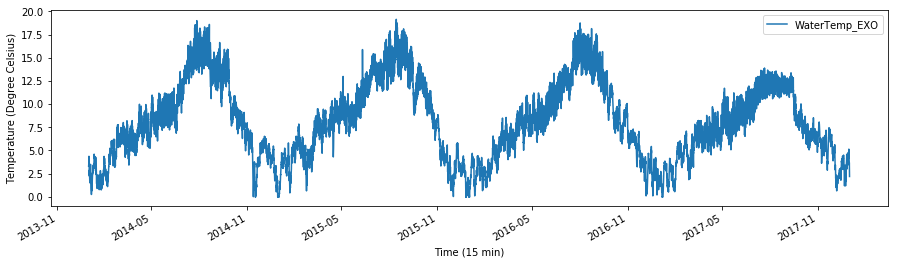

In [39]:
DateTime = pd.to_datetime(df['LocalDateTime'].values)
df_plot = pd.DataFrame(df['DataValue'].values, index=DateTime, columns=['WaterTemp_EXO'])
ax = df_plot.plot()
ax.set_xlabel("Time (15 min)")
ax.set_ylabel("Temperature (Degree Celsius)")
plt.show()
jtplot.figsize(x=15, y=4)

In [44]:
# Select specific conductance data from VariableID = 2
# Temperature data   (-9996.22 data)
conn = lite.connect('odm.sqlite')
df = pd.read_sql_query("SELECT LocalDateTime, datavalue FROM datavalues WHERE VariableID=2 and datavalue > -9000", conn)
df.head()

,LocalDateTime,DataValue
0,1/1/2014 0:00,405.0
1,1/1/2014 0:15,405.1
2,1/1/2014 0:30,405.2
3,1/1/2014 0:45,405.3
4,1/1/2014 1:00,405.4


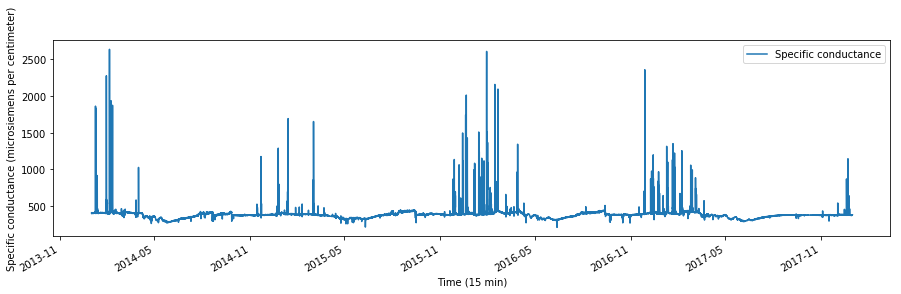

In [45]:
DateTime = pd.to_datetime(df['LocalDateTime'].values)
df_plot = pd.DataFrame(df['DataValue'].values, index=DateTime, columns=['Specific conductance'])
ax = df_plot.plot()
ax.set_xlabel("Time (15 min)")
ax.set_ylabel("Specific conductance (microsiemens per centimeter)")
plt.show()
jtplot.figsize(x=15, y=4)

In [46]:
# Select Stage data from VariableID = 15
conn = lite.connect('odm.sqlite')
df = pd.read_sql_query("SELECT LocalDateTime, datavalue FROM datavalues WHERE VariableID=15 and datavalue is not -9999", conn)
df.head()

,LocalDateTime,DataValue
0,6/4/2014 15:15,84.3
1,6/4/2014 15:30,84.4
2,6/4/2014 15:45,84.6
3,6/4/2014 16:00,84.7
4,6/4/2014 16:15,84.7


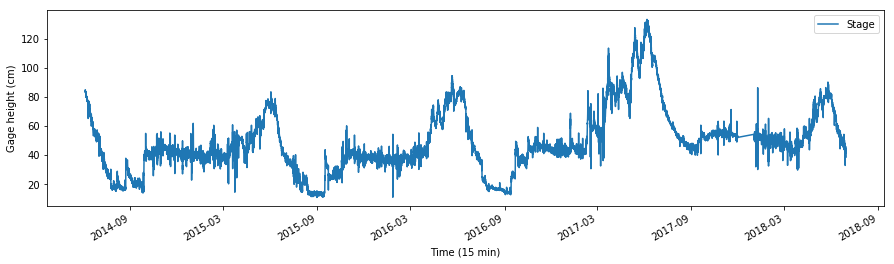

In [47]:
DateTime = pd.to_datetime(df['LocalDateTime'].values)
df_plot = pd.DataFrame(df['DataValue'].values, index=DateTime, columns=['Stage'])
ax = df_plot.plot()
ax.set_xlabel("Time (15 min)")
ax.set_ylabel("Gage height (cm)")
plt.show()
jtplot.figsize(x=15, y=4)

## (4) Load additional data from USGS streamflow station
####     - SiteCode = 01665500,        SiteName = RAPIDAN RIVER NEAR RUCKERSVILLE, VA

In [ ]:
# call sqlite3, import USGS streamflow data using USGS_input.txt which include tables as sites, methods, variables, datavalue, 
# into odm.sqlite
cmd = "sqlite3 -init USGS_input.txt odm.sqlite"
subprocess.run(cmd, shell=True)

In [48]:
# Select Streamflow data from VariableID = 17
conn = lite.connect('odm.sqlite')
df = pd.read_sql_query("SELECT LocalDateTime, datavalue FROM datavalues WHERE VariableID=17 and datavalue is not -9999", conn)
df.head()

,LocalDateTime,DataValue
0,9/30/2017 0:00,5.50
1,10/1/2017 0:00,5.44
2,10/2/2017 0:00,5.37
3,10/3/2017 0:00,5.99
4,10/4/2017 0:00,6.43


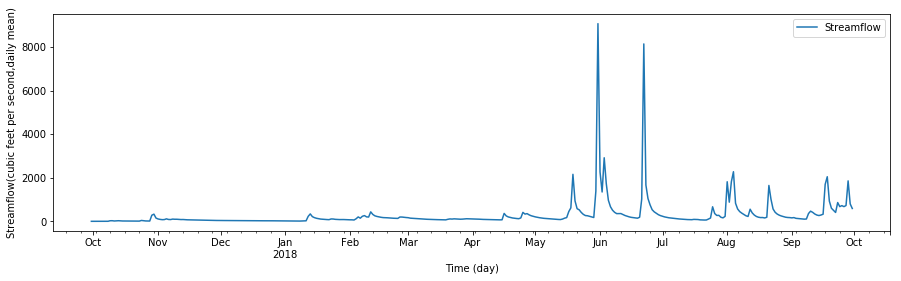

In [50]:
DateTime = pd.to_datetime(df['LocalDateTime'].values)
df_plot = pd.DataFrame(df['DataValue'].values, index=DateTime, columns=['Streamflow'])
ax = df_plot.plot()
ax.set_xlabel("Time (day)")
ax.set_ylabel("Streamflow(cubic feet per second,daily mean)")
plt.show()
jtplot.figsize(x=15, y=4)